## Business Problem

Analyze sales trends to identify high-performing product categories and determine which items should be promoted or restocked more frequently across different store types and locations.

 ### Questions to achieve this 
    1. what are the Top 5 selling item categories?
    2. Which outlet types sell the most?
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Data Understanding + Setup

In [2]:
df= pd.read_excel('BlinkIT Grocery Data.xlsx')
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.shape

(8523, 12)

In [5]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


## 2. Data Cleaning + Preparation
### Handling missing values & Standardize categories & Checking for duplicates

In [6]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [7]:
df['Item Fat Content'].value_counts()

Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [8]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [9]:
df['Item Fat Content'].value_counts()

Item Fat Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [10]:
df['Item Weight'].isnull().sum()

1463

In [11]:
mean_item_weight=df['Item Weight'].mean()
df['Item Weight'].fillna(mean_item_weight,inplace=True)
df['Item Weight'].isnull().sum()

0

In [12]:
df['Sales']=df['Sales'].round(2)

In [13]:
df.duplicated().sum() 

0

## 3. Exploratory Data Analysis (EDA)

In [14]:
df.head(2)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.1,145.48,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.8,115.35,5.0


### **1. Total Sales KPI**

In [32]:
total_sales = df['Sales'].sum()
total_sales

1201681.72

### **2. Average Sales KPI**

In [26]:
Average_sales = df['Sales'].mean()
Average_sales

140.99281004341194

### **3. No. Of Items KPI**

In [37]:
no_of_items = df['Item Type'].nunique()
no_of_items

16

### **4. Average Rating KPI**

In [34]:
average_rating = df['Rating'].mean()
average_rating

3.965857092573038

### 1. Identify the top 5 Selling Item_Type categories by total sales.

In [16]:
top_5_selling_items = (df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False).head(5))
top_5_selling_items

Item Type
Fruits and Vegetables    178124.21
Snack Foods              175434.11
Household                135976.81
Frozen Foods             118559.25
Dairy                    101276.49
Name: Sales, dtype: float64

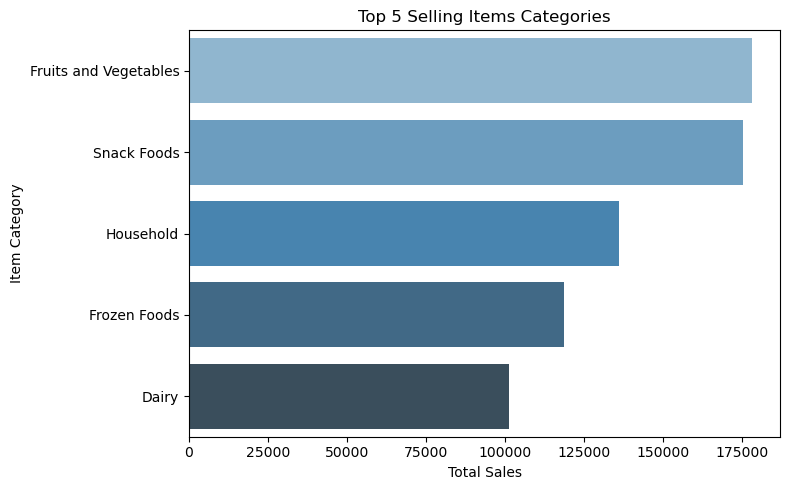

In [17]:
plt.figure(figsize = (8,5))
sns.barplot(x=top_5_selling_items.values,y=top_5_selling_items.index,palette='Blues_d')
#sns.barplot(x=top_5_selling_items.index,y=top_5_selling_items.values,palette='Blues_d')
plt.title('Top 5 Selling Items Categories')
plt.xlabel('Total Sales')
plt.ylabel('Item Category')
plt.tight_layout()
plt.show()

**1. The Most profitable Item Category is "Fruits and Vegetables"**

**2.Based on historical data, Fruits & Vegetables and Snack Foods generate the highest revenue and should be prioritized for inventory planning and targeted promotions across all outlet types**

### 2.High-demand item types per outlet type

In [18]:
Item_Outlet_sales = (df.groupby(['Item Type','Outlet Type'])['Sales'].sum().reset_index())
Item_Outlet_sales.head(2)

,Item Type,Outlet Type,Sales
0,Baking Goods,Grocery Store,10747.20
1,Baking Goods,Supermarket Type1,53665.29


In [19]:
p_table = Item_Outlet_sales.pivot(index ='Item Type', columns = 'Outlet Type', values= 'Sales')

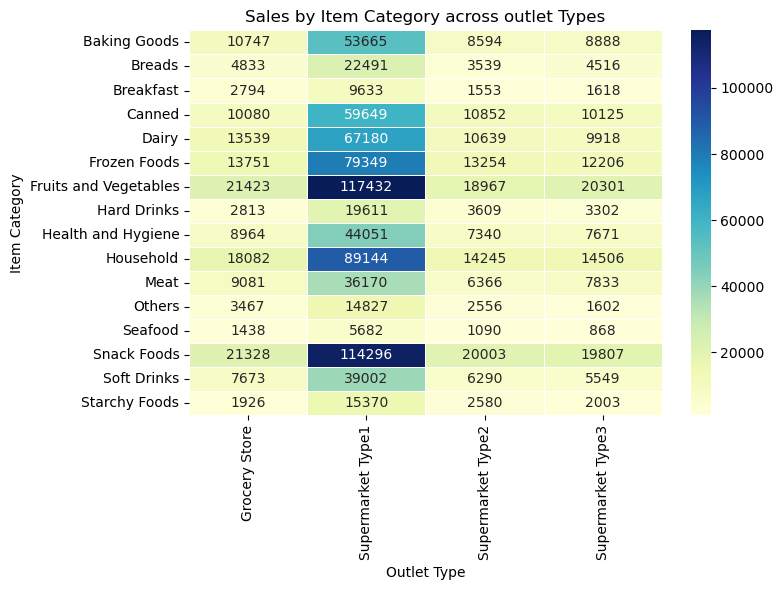

In [20]:
plt.figure(figsize = (8,6))

sns.heatmap(p_table, annot=True, fmt = ".0f",cmap="YlGnBu",linewidth = 0.5)
plt.title('Sales by Item Category across outlet Types')
plt.xlabel("Outlet Type")
plt.ylabel("Item Category")
plt.tight_layout()
plt.show()

## Cross‑Pattern Observations/ High-demand item types per outlet type

**Supermarket Type 1** dominates almost every category – it’s your primary revenue engine.

**Grocery Stores punch above their size** in essentials (Fruits & Veg, Snacks, Household) but fall off for premium or freezer‑dependent items.

**Supermarket Types 2 & 3 trail T1**, yet still account for meaningful sales in core perishables and snack lines.

**Colour gradient confirms numeric ranking**: darkest blues correspond to the three largest figures in the entire matrix (Fruits & Veg + Snack Foods + Household in T1).

## Which outlet types need restocking priority 
 **Fruits & Vegetables** - Top-selling category across all outlets; restock frequently and promote aggressively.
 
 **Snack Foods** - Second highest in sales and profit; restock often and run frequent combo or discount offers.
 
 **Household Items** -  Consistent demand across stores; plan regular restocking with seasonal promotions.
 
 **Frozen Foods & Dairy** - Perform well in Supermarket Type 1; restock only where cold storage is available and demand supports it.

## **Strategic Actions You Could Draw**                                  

1. **Supermarket Type 1 (Outlet Type)** -  Fruits & Veg, Snack Foods, Household, Frozen, Dairy **(High - demand Categories)** - Maintain highest inventory levels & Cross‑promote Frozen with Snacks **(Suggested Actions)**
   
2. **Grocery Store (Outlet Type)** -  Fruits & Veg, Snack Foods, Household **(High - demand Categories)** - Focus on fresh produce & impulse snacks & Limited freezer space ⇒ Frozen stocks cautiously **(Suggested Actions)**
 
3. **Supermarket Type 2 & 3 (Outlet Type)** -  Fruits & Veg, Snacks (moderate), Household (moderate) **(High - demand Categories)** - Rebalance shelf space to mirror T1 success & Pilot promotions for Dairy & Frozen to lift sales **(Suggested Actions)**

